<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

<h1>Initial Data Check<span class="tocSkip"></span></h1>

Before we jump into a full analysis of the data, it's worthwhile to first spend a little time exploring the dataset and getting a handle on both the types and quality of data available.

We'll be using data supplied through [meteostat](https://meteostat.net/en/), which provides weather data from a number of organisations including the NOAA. 

First, let's have a look at the format of the station data that meteostat gives us.

In [9]:
import meteostat

stations = meteostat.Stations().fetch()

stations

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
00FAY,Holden Agdm,CA,AB,71227,CXHD,53.1900,-112.2500,688.0,America/Edmonton,2020-01-01,2024-11-25,2002-11-01,2024-03-13,2003-01-01,2022-01-01
00TG6,Athabasca 1,CA,AB,<NA>,<NA>,54.7200,-113.2900,515.0,America/Edmonton,NaT,NaT,2000-01-01,2022-07-12,2000-01-01,2010-01-01
01001,Jan Mayen,NO,<NA>,01001,ENJA,70.9333,-8.6667,10.0,Europe/Oslo,1931-01-01,2024-10-30,1921-12-31,2024-11-17,1922-01-01,2022-01-01
01002,Grahuken,NO,SJ,01002,<NA>,79.7833,14.4667,0.0,Europe/Oslo,1986-11-09,2024-10-30,2010-10-07,2020-08-17,NaT,NaT
01003,Hornsund,NO,<NA>,01003,<NA>,77.0000,15.5000,10.0,Europe/Oslo,1985-06-01,2024-10-30,2009-11-26,2020-08-31,2016-01-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXYDC,Bonavista,CA,NL,71178,<NA>,48.6700,-53.1100,26.0,America/St_Johns,2020-01-01,2022-12-14,2006-07-09,2022-12-11,2006-01-01,2022-01-01
ZYC17,Kingston Airport,CA,ON,<NA>,<NA>,44.2300,-76.6000,92.0,America/Toronto,2020-01-01,2022-12-15,2018-10-29,2022-12-12,2019-01-01,2022-01-01
ZYITU,Selfridge Air National Guard Base,US,MI,<NA>,KMTC,42.6046,-82.8353,177.0,America/Detroit,2022-04-23,2024-11-25,2022-04-24,2022-04-25,NaT,NaT


We sure have a wealth of data, including the station name and location, and the start and end of different data streams! But there are some issues here we'll have to be mindful of.

1. Station IDs don't have a uniform pattern, and can include a mix of numbers and letters, likely a reference to the station type.

2. Station names can include slashes and spaces. 

3. Not all stations have a valid region, WMO ID, and/or ICAO ID.

4. The start and end dates for data availability can contain 'NaT', obviously an invalid datetime.

We're going to be most interested in the country, latitude, longitude, and some of the data start/end times, so of the above, (4) is most likely to cause an issue. So right away we know to be wary of any potential missing data  and type inconsistencies. 

Let's have a look now at the weather data available for one of our stations, Holden Agdm in Canada (country code CA), for each month in a short range:

In [8]:
from datetime import datetime

# get location information for station we want
station_loc = stations[stations['name']=="Holden Agdm"]

# Set time period
start = datetime(2020, 1, 1)
end = datetime(2023, 1, 1)

weather_data = meteostat.Monthly(station_loc, start, end).fetch()
weather_data

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2020-01-01,-15.1,-20.6,-9.6,NaN,14.5,NaN,NaN
2020-02-01,-9.7,-16.0,-3.4,NaN,16.2,NaN,NaN
2020-03-01,-9.7,-15.5,-3.9,NaN,NaN,NaN,NaN
2020-04-01,-0.7,-7.3,5.8,NaN,17.3,NaN,NaN
2020-05-01,10.1,3.4,16.7,58.1,16.3,NaN,NaN
2020-06-01,14.1,8.4,19.7,NaN,14.7,NaN,NaN
2020-07-01,17.0,11.2,22.8,NaN,13.5,NaN,NaN
2020-08-01,15.7,9.0,22.5,69.2,14.4,NaN,NaN
2020-10-01,1.0,-4.5,6.5,NaN,15.7,NaN,NaN


We can see that temperature data is rather reliable for this station, the other variables (precipitation, wind speed, pressure, and sunshine duration) are less reliable, or even completely missing. This makes sense, as not all weather stations will be designed to collect all forms of data at all intervals.

An important thing to note here are the units. Thankfully the meteostat data has standardised units with the [documentation](https://dev.meteostat.net/formats.html#formats-units) describing them all. For example, temperature is given in degrees Celcius for every station. If this were not the case, we would need to perform an additional step to verify the units being reported for each station.

In any case, we have some data now so let's see it plotted! We can do this in many ways, but given that we already have a dataframe object, we may as well use pandas.

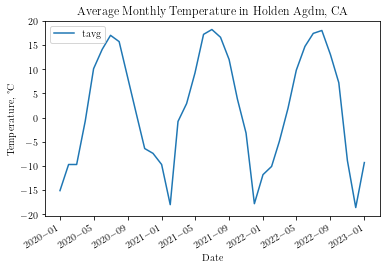

In [10]:
import pandas as pd

station_country = station_loc["country"].values[0]
station_name = station_loc["name"].values[0]

plot = weather_data.plot(y="tavg", title=f"Average Monthly Temperature in {station_name}, {station_country}",
                        xlabel="Date", ylabel="Temperature, °C")

Looking good! We can see that Holden Agdm sees some large swings in average monthly temperature over the year, with up to +20°C in the summer and down to -20°C in the winter.

It would be interesting to look at something over a slightly longer time period, however monthly data only began in Holden Agdm in 2003, which is likely around the time the station was set up. We can see a much older station a few levels down though in Jan Mayen, Norway.

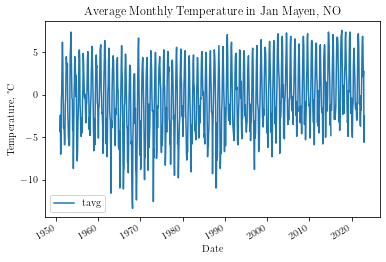

In [19]:
# get location information for station we want
station_loc = stations[stations['name']=="Jan Mayen"]
station_country = station_loc["country"].values[0]
station_name = station_loc["name"].values[0]

# Reset time period
start = datetime(1922, 1, 1)
end = datetime(2023, 1, 1)

weather_data = meteostat.Monthly(station_loc, start, end).fetch()

plot = weather_data.plot(y="tavg", title=f"Average Monthly Temperature in {station_name}, {station_country}",
                        xlabel="Date", ylabel="Temperature, °C")

This is a little surprising! We can see in our station table that Monthly temperature data began recording in 1922, and yet here our plot only begins around 1950. Looking at our station weather, we can see why:

In [13]:
weather_data

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
1922-01-01,NaN,-2.6,NaN,25.4,NaN,NaN,NaN
1922-02-01,NaN,-3.8,NaN,33.7,NaN,NaN,NaN
1922-03-01,NaN,-8.6,NaN,24.1,NaN,NaN,NaN
1922-04-01,NaN,-5.7,NaN,16.5,NaN,NaN,NaN
1922-05-01,NaN,-3.1,NaN,10.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-09-01,5.7,4.6,7.0,94.9,17.1,1012.1,NaN
2022-10-01,2.1,0.5,3.9,89.8,24.4,1001.4,NaN
2022-11-01,2.8,1.5,3.9,29.8,17.5,1007.6,NaN


So while *a* kind of temperature reading began in 1992, it wasn't the average, it was the minimum! If we do a quick Google, we discover that Jan Mayen is actually a volcanic island in the arctic ocean, and has no permanent population, hence it's not so outlandish that they only initially recorded the minima.

If we change our plot to look at the minima over time, we should get the full range:

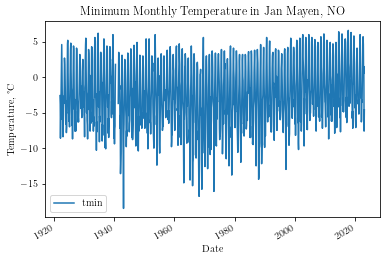

In [14]:
plot = weather_data.plot(y="tmin", title=f"Minimum Monthly Temperature in {station_name}, {station_country}",
                        xlabel="Date", ylabel="Temperature, °C")

In the Jan Mayen data above we see an interesting drop in temperature through the 1970's. This is now thought to have been caused by aerosols reflecting sunlight (either directly or through cloud seeding), and was a phenomenon largely isolated to the Northern Hemisphere. We can also see an anomalous dip shortly after 1940. This was a period of extreme winters experienced across much of Europe, setting new record lows.

In analysing data for migraine prediction, we will be more interested in short term data, particularly hourly, so let's have a look at that for Jan Mayen too.

In [23]:
start = datetime(2024, 1, 1, 0, 0, 0)
end = datetime(2024, 1, 1, 23, 59, 59)

weather_data = meteostat.Hourly(station_loc, start, end).fetch()
weather_data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2024-01-01 00:00:00,-7.0,-13.1,62.0,0.0,NaN,318.0,22.0,NaN,1020.8,NaN,2.0
2024-01-01 01:00:00,-6.5,-12.4,63.0,0.0,NaN,330.0,18.4,NaN,1020.4,NaN,2.0
2024-01-01 02:00:00,-6.5,-11.2,69.0,0.0,NaN,348.0,12.6,NaN,1020.5,NaN,2.0
2024-01-01 03:00:00,-6.4,-10.4,73.0,0.0,NaN,357.0,6.8,NaN,1020.2,NaN,2.0
2024-01-01 04:00:00,-7.0,-10.5,76.0,0.0,NaN,241.0,2.9,NaN,1020.0,NaN,2.0
2024-01-01 05:00:00,-5.7,-9.9,72.0,0.0,NaN,76.0,17.3,NaN,1019.6,NaN,3.0
2024-01-01 06:00:00,-5.2,-9.5,72.0,0.0,NaN,84.0,19.4,NaN,1019.6,NaN,3.0
2024-01-01 07:00:00,-5.7,-9.9,72.0,0.0,NaN,40.0,8.3,NaN,1019.5,NaN,3.0
2024-01-01 08:00:00,-4.7,-8.6,74.0,0.0,NaN,98.0,20.5,NaN,1019.2,NaN,3.0


Our hourly data has a slightly different format to the monthly, which makes sense as these are likely to be raw hourly measurements and are not pre-averaged. Hence we only have a single temperature value rather than a range. We also have a new column, 'coco', which is the Weather Condition Code. An integer, each value corresponds to a different named weather condition; in this case, '2' corresponds to 'Fair'. However, it will not be available for all stations. The full list of condition codes is given on the [meteostat website](https://dev.meteostat.net/formats.html#weather-condition-codes).

In our case, we are most likely interested in the relative humidity (rhum), precipitation (prcp), wind speed (wspd), and pressure (pres) as these are all implicated in migraine. 

With that in mind, let's have a look at what these variables were doing over the day on January 1st 2024 in Jan Mayen, Norway.

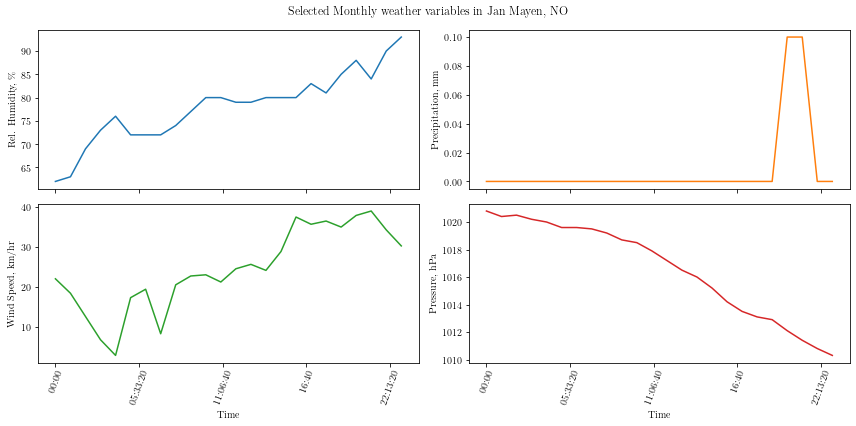

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# first, reindex to time rather than datetime
weather_data = meteostat.Hourly(station_loc, start, end).fetch()
weather_data.index = weather_data.index.time

plot = weather_data.plot(subplots=True, 
                         layout=(2,2), 
                         figsize=(12,6),
                         y=["rhum","prcp","wspd","pres"],
                         legend=False,
                         title=f"Selected {frequency} weather variables in {station_name}, {station_country}",
                         sharex=True,
                         xlabel="Time")

plot[0,0].set_ylabel("Rel. Humidity, \%")
plot[0,1].set_ylabel("Precipitation, mm")
plot[1,0].set_ylabel("Wind Speed, km/hr")
plot[1,1].set_ylabel("Pressure, hPa")

# format x-axis ticks
for jj in range(0,2):
    plt.setp(plot[1,jj].xaxis.get_majorticklabels(), rotation=70)

plt.tight_layout()


So the relative humidity rose throughout the day, there was only a very small amount (0.1mm) of precipitation recorded in the evening, the wind speed was variable rising over the day but not too high, and the pressure steadily dropped. 